In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [6]:
from utils import style, hdi, find_max

In [7]:
style(name="seaborn-notebook")

In [8]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [9]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [10]:
eff_vol = glob(join(root_data_dir, 'MCMC', 'dm_mock', 'mock', 'comp', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_0001000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_0005000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_0010000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_0050000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_0100000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_0500000.hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000000.hdf5']

In [33]:
n_levels = [int(file.split('/')[-1].split('_')[-1].split('.')[0]) for file in eff_vol]
n_levels = np.array(n_levels)
n_levels

array([   1000,    5000,   10000,   50000,  100000,  500000, 1000000])

In [16]:
mcmc_dm_dir = join(root_data_dir, "MCMC", "dm", "comp", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data'

In [17]:
dm_2_files = glob(join(mcmc_dm_dir, "chain-2-*"))
dm_2_files.sort()
dm_2_files

['/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-0.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-1.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-2.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-3.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-4.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-5.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/comp/data/chain-2-6.npy']

## tes

In [19]:
index =0
df = np.load(join(mcmc_dm_dir, f"chain-2-{index}.npy"))
df.shape

(20000, 68, 33)

In [20]:
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

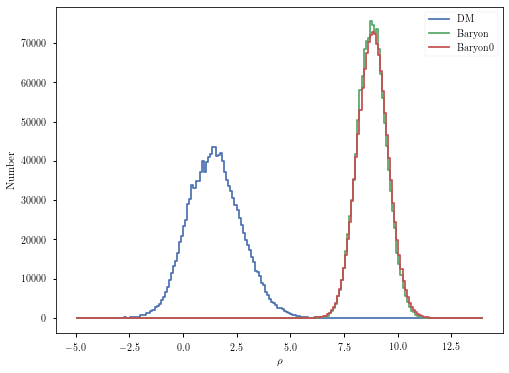

In [21]:
rho = np.linspace(-5, 14, 200)
rhoDM_num, _ = np.histogram(rhoDM, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoDM_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [22]:
rhoDM_sample = np.random.choice(rhoDM, size=2000, replace=False)
rhoDM_fit = skewnorm.fit(rhoDM_sample)
rhob_sample = np.random.choice(rhob, size=2000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=2000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((1.0660796047695649, 0.7259556346013368, 1.48500368732143),
 (0.5233172402610732, 8.576417041358072, 0.7323211170627515),
 (8.91030937891562, 0.7298870601722316))

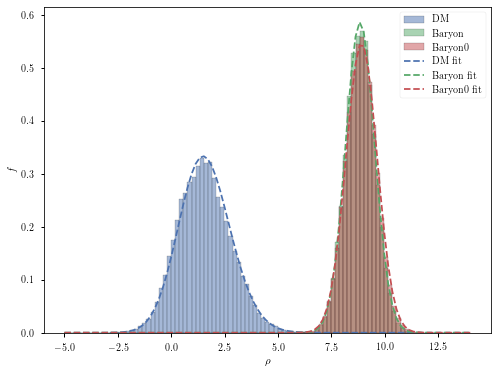

In [23]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoDM_fit, rhob_fit, rhob0_fit

rhoDM = 1.49 +1.23/-1.17
rhob = 8.84 +0.69/-0.68
rhob0 = 8.91 +0.73/-0.73


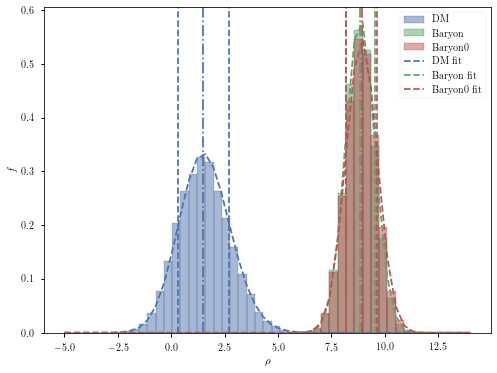

In [24]:
rhoDM_low, rhoDM_high = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), perc=0.68, res=1E3, min=-5, max=14)
rhoDM_mode = find_max(lambda x: skewnorm.pdf(x, *rhoDM_fit), x0=0.0)[0]

rhob_low, rhob_high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]

rhob0_low, rhob0_high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoDM_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoDM_low, color='C0', ls='--')
ax.axvline(rhoDM_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoDM_mode:.02f} +{rhoDM_high-rhoDM_mode:.02f}/-{rhoDM_mode-rhoDM_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


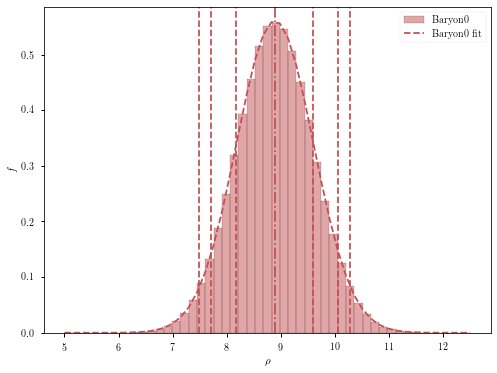

In [25]:
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# fit with gaussian
rhob0_fit = norm.fit(rhob0)
# mode
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]
# find 
sigma_1 = 68/100
sigma_2 = 90/100
sigma_3 = 95/100
rhob0_low = {}
rhob0_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=sigma, res=1E3, min=5, max=13)
    rhob0_low[i] = low
    rhob0_high[i] = high
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for i in range(3):
    ax.axvline(rhob0_low[i], color='C2', ls='--')
    ax.axvline(rhob0_high[i], color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [26]:
from tqdm import tqdm

rhoDM_modes = []
rhoDM_errs = []
rhob_modes = []
rhob_errs = []
rhoDM_fits = []

for index in tqdm(range(len(dm_2_files))):
    df = np.load(dm_2_files[index])
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    print("fitting...")
    rhoDM_sample = np.random.choice(rhoDM, size=2000, replace=False)
    rhoDM_fit = skewnorm.fit(rhoDM_sample)
    rhoDM_fits.append(rhoDM_fit)
    rhob_sample = np.random.choice(rhob, size=2000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    print("calculating HDI...")
    rhoDM_err = []
    rhob_err = []
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), perc=sigma, res=1E3, min=-5, max=15)
        rhoDM_err.append({'sigma':sigma, 'low': low, 'high': high})
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
        rhob_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoDM_errs.append(rhoDM_err)
    rhob_errs.append(rhob_err)
    print("calculating mode")
    rhoDM_mode = find_max(lambda x: skewnorm.pdf(x, *rhoDM_fit), x0=0.0)[0]
    rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
    rhoDM_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

  0%|          | 0/7 [00:00<?, ?it/s]

fitting...
calculating HDI...


 14%|█▍        | 1/7 [00:02<00:13,  2.27s/it]

calculating mode
fitting...
calculating HDI...


 29%|██▊       | 2/7 [00:06<00:18,  3.70s/it]

calculating mode
fitting...
calculating HDI...


 43%|████▎     | 3/7 [00:11<00:16,  4.11s/it]

calculating mode
fitting...
calculating HDI...


 57%|█████▋    | 4/7 [00:16<00:12,  4.33s/it]

calculating mode
fitting...
calculating HDI...


 71%|███████▏  | 5/7 [00:20<00:08,  4.40s/it]

calculating mode
fitting...
calculating HDI...


 86%|████████▌ | 6/7 [00:25<00:04,  4.42s/it]

calculating mode
fitting...
calculating HDI...


100%|██████████| 7/7 [00:29<00:00,  4.26s/it]

calculating mode


In [27]:
rhoDM_fits

[(1.2596400615529837, 0.5664933358682329, 1.592276270309179),
 (0.8162534556137643, 1.392629939537441, 0.8364854463307181),
 (-0.6907542475880131, 2.1359287423733164, 0.7350168777324184),
 (9.461095766448511e-05, 1.9083428870312957, 0.6003841043471534),
 (0.939010188846169, 1.395791921415079, 0.6950653960692219),
 (0.0001205167247600961, 2.470768552548987, 0.49937020134089005),
 (0.5403158422478302, 2.104360481500212, 0.5541644641651174)]

(-2.0, 3.0)

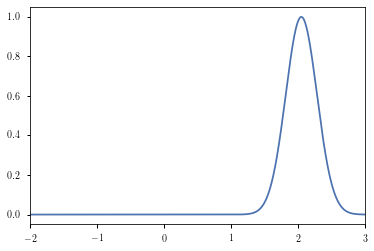

In [28]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoDM = None
for p in rhoDM_fits:
    if log_rhoDM is None:
        log_rhoDM = skewnorm.logpdf(rho, *p)
    else:
        log_rhoDM += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoDM_com = np.exp(log_rhoDM)
# normalize with max value
rhoDM_com /= rhoDM_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoDM_com, label='rhoDM')
ax.set_xlim(-2,3)

In [29]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoDM_com_fit, _ = curve_fit(skewpdf, rho, rhoDM_com, p0=[1, 1.0, 2.0, 1])
rhoDM_com_fit

array([0.58539656, 0.41506326, 1.972205  , 0.2453744 ])

(-2.0, 3.0)

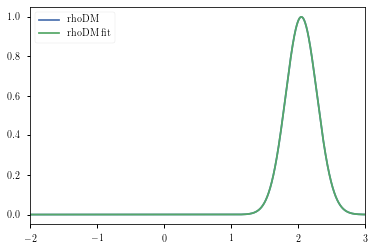

In [30]:
plt.plot(rho, rhoDM_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoDM_com_fit), label='rhoDM fit')
plt.legend()
plt.xlim(-2,3)

In [31]:
rhoDM_com_err = []
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewpdf(x, *rhoDM_com_fit), perc=sigma, res=1E3, min=-1, max=3)
    rhoDM_com_err.append({'sigma':sigma, 'low': low, 'high': high})
rhoDM_com_mode = find_max(lambda x: skewpdf(x, *rhoDM_com_fit), x0=0.0)[0]
rhoDM_com_mode, rhoDM_com_err

(2.0455625000000026,
 [{'sigma': 0.68, 'low': 1.810810810810811, 'high': 2.279279279279279},
  {'sigma': 0.9, 'low': 1.6626626626626626, 'high': 2.4314314314314314},
  {'sigma': 0.95, 'low': 1.5905905905905904, 'high': 2.5075075075075075}])

In [61]:
# for i in range(len(c)):
#     print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

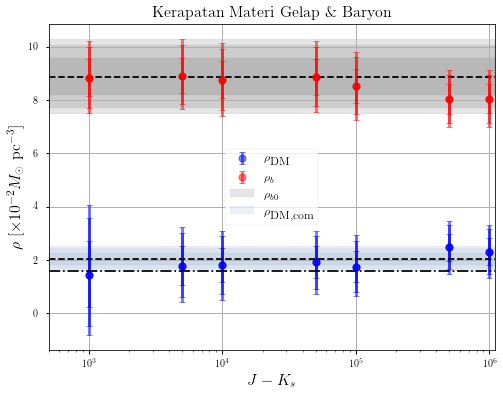

2.0455625000000026

In [36]:
ns = np.linspace(n_levels.min()-500, n_levels.max()+100_000, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoDM_errs])
    high = np.array([err[i]['high'] for err in rhoDM_errs])
    dm_ax = ax.errorbar(n_levels, rhoDM_modes, yerr=[rhoDM_modes-low, high-rhoDM_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(n_levels, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(ns, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoDM_com_ax = ax.fill_between(ns, rhoDM_com_err[i]['low'], rhoDM_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoDM_com_ax], 
                  [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{DM,com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoDM_com_mode, color='black', linestyle='--')
ax.axhline(y=1.6, color='black', linestyle='-.', label='asli')
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(ns.min(), ns.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.set_xscale('log')
ax.grid()
fig.savefig(join('img', 'rhoDM-dm-mock.pdf'), dpi=70)
plt.show()
rhoDM_com_mode